In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the data 
education_data = pd.read_csv('dataset_education_2018-2023_melt.csv')

In [3]:
# Aggregate the education data by year, state, and education level to get cumulative totals
education_aggregated = education_data.groupby(['Year', 'State', 'Education_Level']).agg({'Number_Individuals': 'sum'}).reset_index()

In [4]:
# Pivot the data to prepare for a stacked bar plot
education_by_state = education_aggregated.pivot_table(values='Number_Individuals', index='State', columns='Education_Level', aggfunc='sum', fill_value=0)

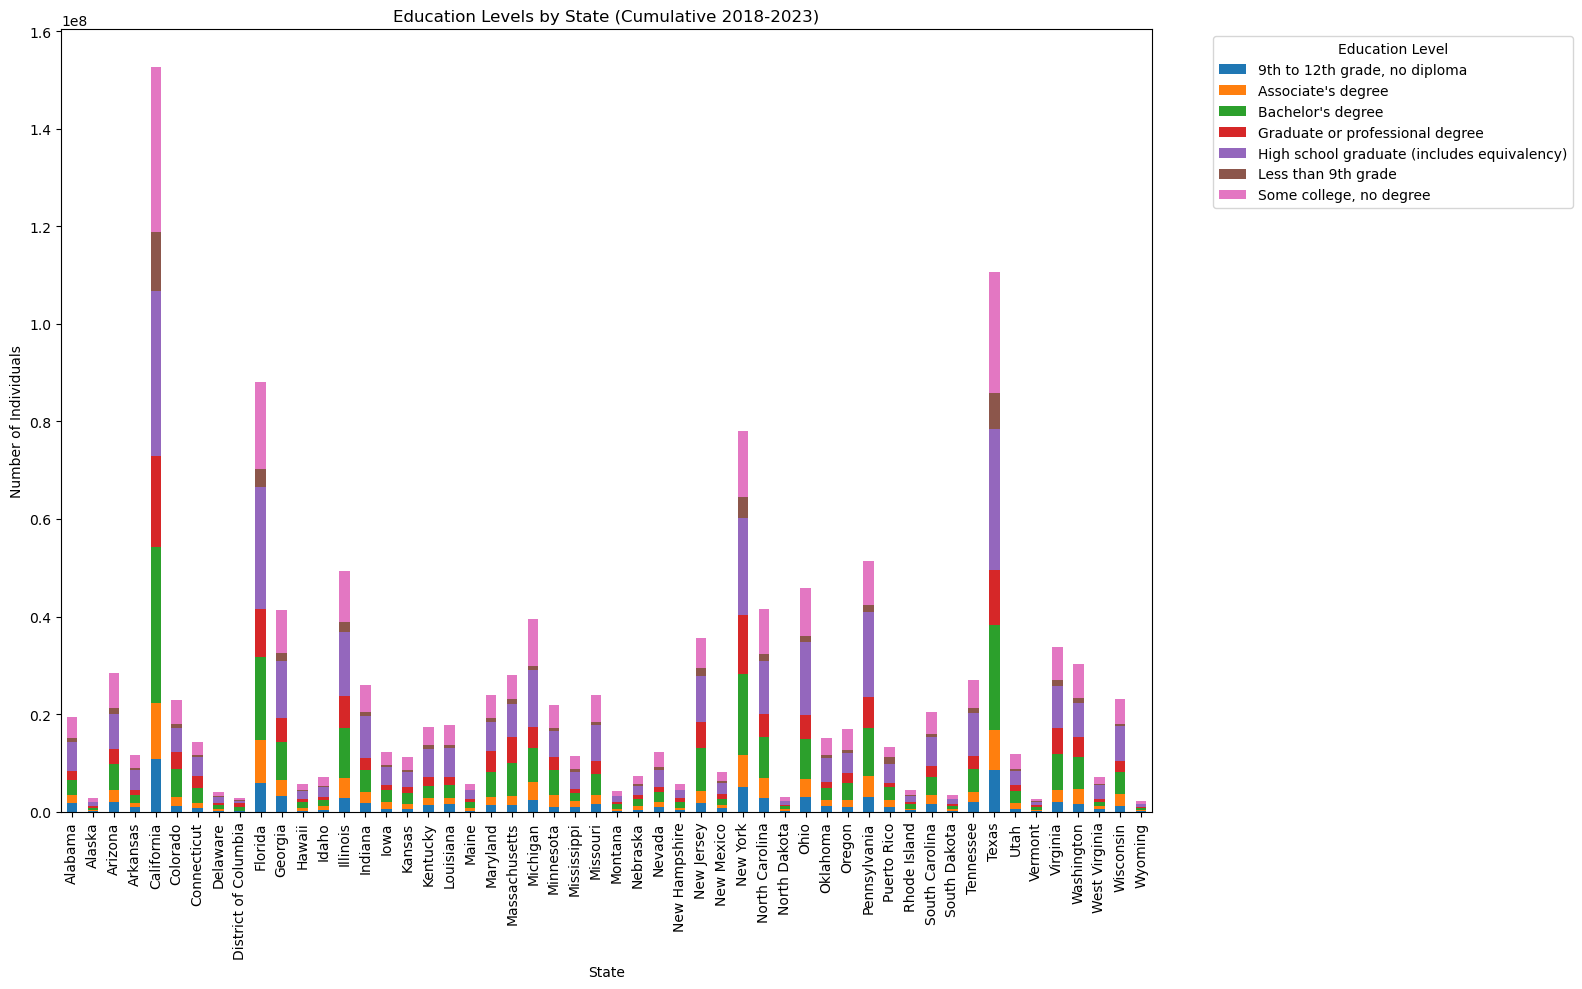

In [5]:
# Plot the stacked bar chart
education_by_state.plot(kind='bar', stacked=True, figsize=(16, 10))

# Add title and labels
plt.title("Education Levels by State (Cumulative 2018-2023)")
plt.xlabel("State")
plt.ylabel("Number of Individuals")
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
poverty_data = pd.read_csv('poverty_threshold_measure.csv')

In [7]:
# Calculate the average poverty levels by state across all years
poverty_by_state_avg = poverty_data.groupby('State').agg({'Poverty_Threshold_Measure': 'mean'}).reset_index()

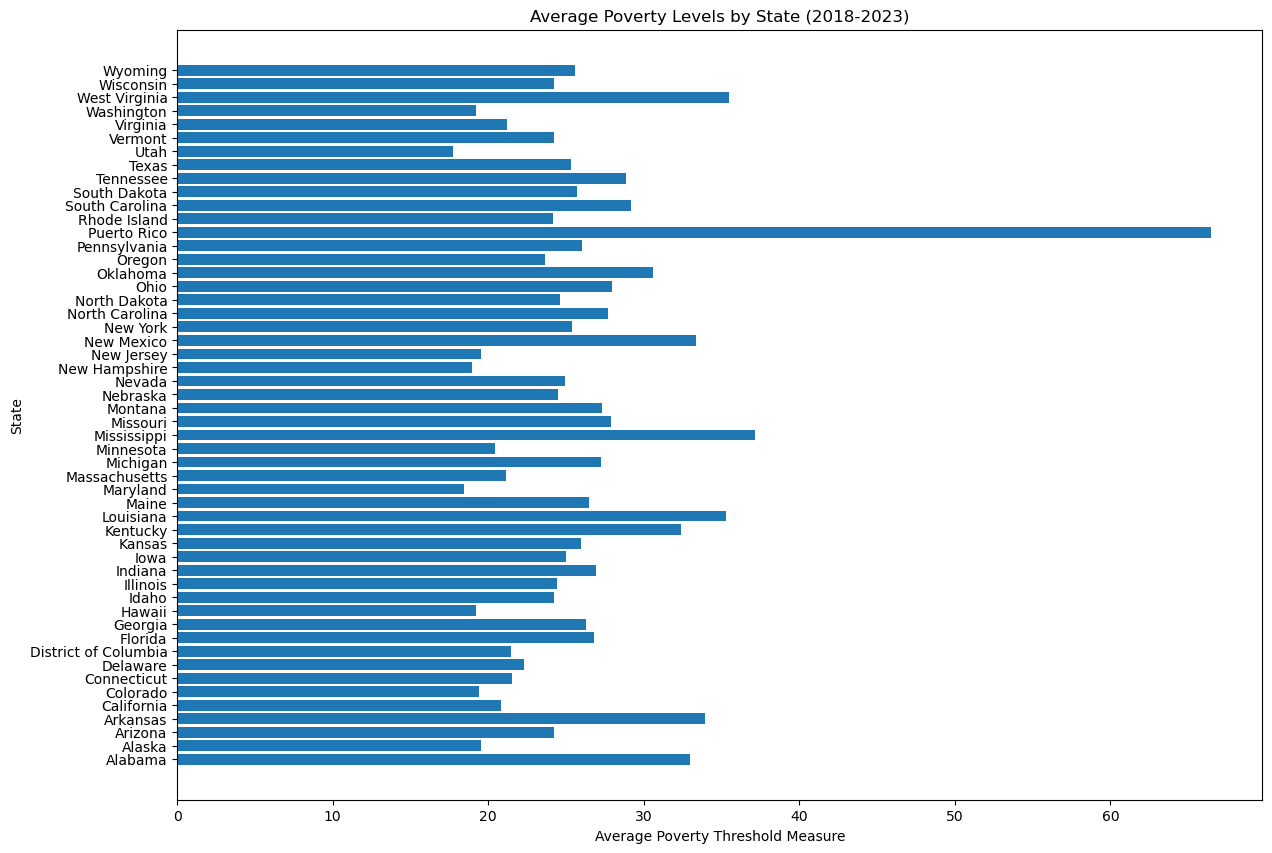

In [8]:
# Plot the average poverty levels by state as a horizontal bar chart
plt.figure(figsize=(14, 10))
plt.barh(poverty_by_state_avg['State'], poverty_by_state_avg['Poverty_Threshold_Measure'])

# Add title and labels for clarity
plt.title("Average Poverty Levels by State (2018-2023)")
plt.xlabel("Average Poverty Threshold Measure")
plt.ylabel("State")

# Display the plot
plt.show()

In [9]:
# Aggregate the education data by state and education level to get total counts per state
education_by_state2 = education_data.groupby(['State', 'Education_Level']).agg({'Number_Individuals': 'sum'}).reset_index()

In [10]:
# Pivot the data to calculate proportions of each education level within each state
education_pivot = education_by_state2.pivot(index='State', columns='Education_Level', values='Number_Individuals').fillna(0)
education_pivot = education_pivot.div(education_pivot.sum(axis=1), axis=0)  # Normalize to get proportions

In [11]:
# Merge the normalized education data with average poverty thresholds by state
poverty_by_state_avg = poverty_data.groupby('State').agg({'Poverty_Threshold_Measure': 'mean'}).reset_index()
merged_data = education_pivot.merge(poverty_by_state_avg, on='State')


In [13]:
# Correlation analysis
correlation_matrix = merged_data.select_dtypes(include='number').corr()

# Display correlation matrix for poverty threshold with each education level
print("Correlation Matrix:")
print(correlation_matrix['Poverty_Threshold_Measure'].sort_values(ascending=False))

Correlation Matrix:
Poverty_Threshold_Measure                      1.000000
Less than 9th grade                            0.594277
9th to 12th grade, no diploma                  0.549322
High school graduate (includes equivalency)    0.411787
Associate's degree                             0.168066
Some college, no degree                       -0.145374
Graduate or professional degree               -0.429666
Bachelor's degree                             -0.538411
Name: Poverty_Threshold_Measure, dtype: float64


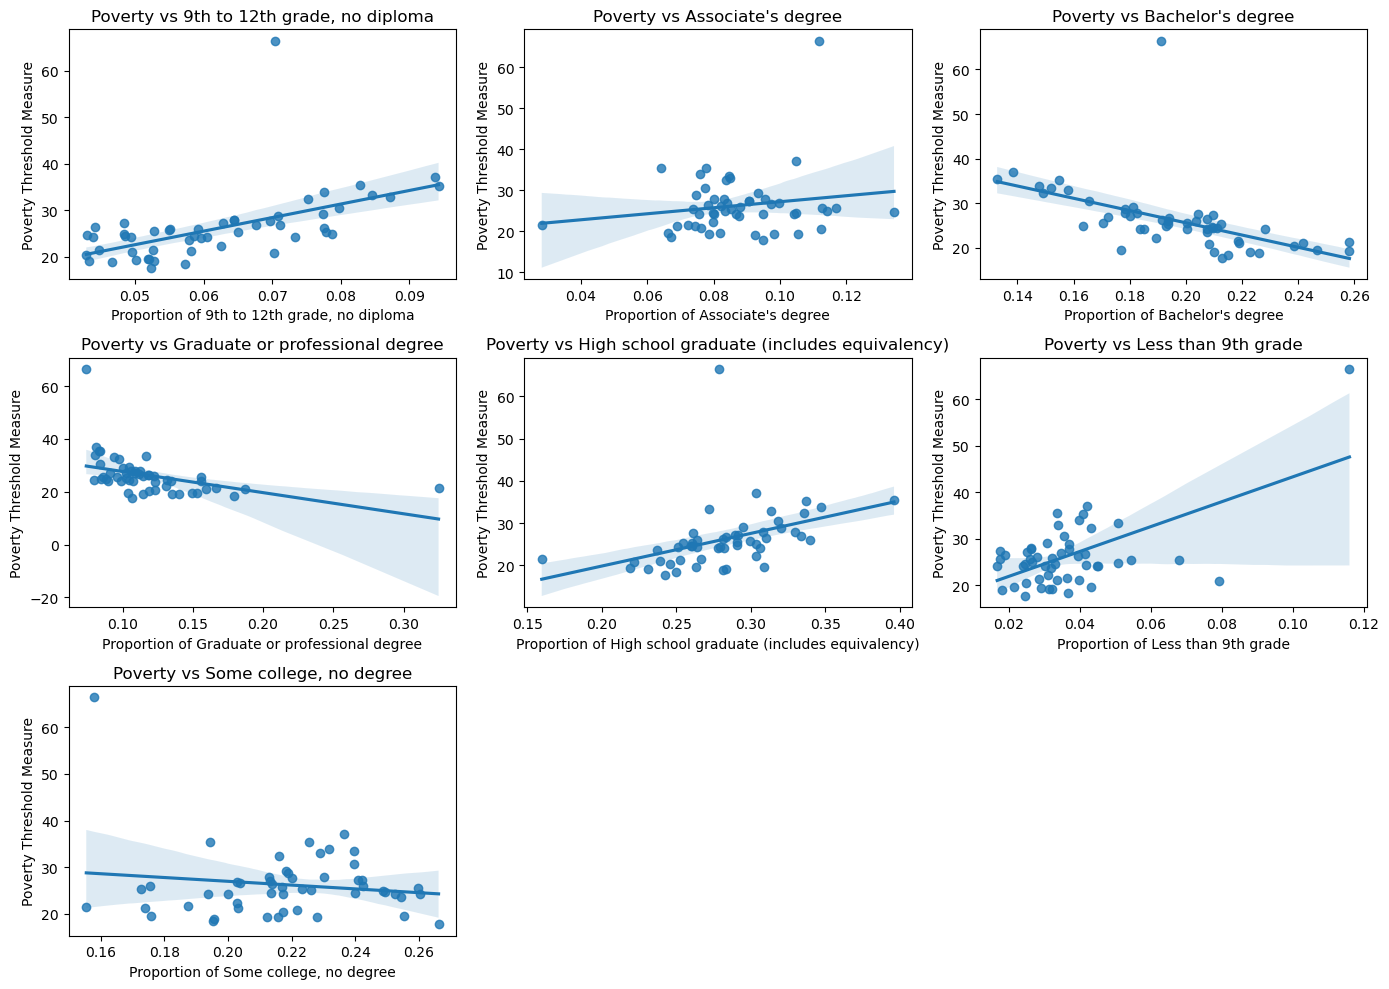

In [16]:
# Visualization: Scatter plots of education proportions vs. poverty threshold
plt.figure(figsize=(14, 10))
for i, education_level in enumerate(education_pivot.columns, 1):
    plt.subplot(3, 3, i)
    sns.regplot(x=merged_data[education_level], y=merged_data['Poverty_Threshold_Measure'])
    plt.title(f"Poverty vs {education_level}")
    plt.xlabel(f"Proportion of {education_level}")
    plt.ylabel("Poverty Threshold Measure")

plt.tight_layout()
plt.show()
